In [1]:
#Importing all the required packages(libraries) 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset into pandas dataframe
loan = pd.read_csv('loan.csv')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


D:\CSE\app\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# DATA UNDERSTANDING

In [3]:
#How our dataframe looks like
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Looking at the columns of the dataframe
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## DATA CLEANING

In [5]:
#Let's check for the missing values in the each column
loan.isnull().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
#percentage of missing value in each column
round((loan.isnull().sum()/len(loan.index)),2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


We can clearly see that there are many columns with 100% missing values and some columns with 65% and 33% missing values 

In [7]:
#Let's find the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
missing_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [8]:
#Remove all the columns having >90% missing values
loan = loan.drop(missing_columns, axis = 1)

In [9]:
loan.shape

(39717, 55)

In [10]:
#Rechecking the columns for missing values
round((loan.isnull().sum()/len(loan.index)), 2) *100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [11]:
#There are 2 columns with 65% and 33% missing values
#Let's have a look at those columns
loan.loc[:,['mths_since_last_delinq','desc']].head()


,mths_since_last_delinq,desc
0,NaN,Borrower added on 12/22/11 > I need to upgra...
1,NaN,Borrower added on 12/22/11 > I plan to use t...
2,NaN,NaN
3,35.0,Borrower added on 12/21/11 > to pay for prop...
4,38.0,Borrower added on 12/21/11 > I plan on combi...


This both columns cannot be used for predicting default because they are genereated after sometime of the loan given and so dropping them will be better option

In [12]:
#Droppinf two columns
loan = loan.drop(['mths_since_last_delinq','desc'],axis=1)

In [13]:
loan.shape

(39717, 53)

In [14]:
#Rechecking the columns for missing values
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [15]:
#counting missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [16]:
#checking whether sum of missing value in a row is > 5
len(loan[loan.isnull().sum(axis=1)>5].index)

0

The data looks clean and large. Let us have a look at format of the columns

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

The column int_rate is of the type object. Let's convert it into float type

In [18]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [20]:
loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
5          3 years
6          8 years
7          9 years
8          4 years
9         < 1 year
10         5 years
11       10+ years
12        < 1 year
13         3 years
14         3 years
15        < 1 year
16         4 years
17       10+ years
18          1 year
19         6 years
20         3 years
21       10+ years
22       10+ years
23         5 years
24          1 year
25         2 years
26         9 years
27         2 years
28       10+ years
29        < 1 year
           ...    
39687      9 years
39688      6 years
39689     < 1 year
39690      3 years
39691       1 year
39692       1 year
39693     < 1 year
39694      8 years
39695      7 years
39696      2 years
39697     < 1 year
39698       1 year
39699      4 years
39700     < 1 year
39701      7 years
39702       1 year
39703      2 years
39704     < 1 year
39705      8 years
39706     < 1 year
39707      2 years
39708      4

we can see that the variable emp_length is not in proper format

In [21]:
#So let's extract the numeric part of variable emp_length
#Lets drop the missing values from the column so regex does not make any problem
loan = loan[~loan['emp_length'].isnull()]

#using regular expression to extract numeric values from string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x : re.findall('\d+',str(x))[0])

#converting into numeric type
loan['emp_length'] = loan['emp_length'].apply(lambda x : pd.to_numeric(x))

In [22]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [23]:
loan['emp_length']

0        10
1         1
2        10
3        10
4         1
5         3
6         8
7         9
8         4
9         1
10        5
11       10
12        1
13        3
14        3
15        1
16        4
17       10
18        1
19        6
20        3
21       10
22       10
23        5
24        1
25        2
26        9
27        2
28       10
29        1
         ..
39687     9
39688     6
39689     1
39690     3
39691     1
39692     1
39693     1
39694     8
39695     7
39696     2
39697     1
39698     1
39699     4
39700     1
39701     7
39702     1
39703     2
39704     1
39705     8
39706     1
39707     2
39708     4
39709     1
39710     1
39711     5
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: int64

The data looks all clear and is ready to perform analysis.

## DATA ANALYSIS

We can not use the customer behaviour variables as they are generated after the loan is given as they are of no use in prediction of loan approval/rejection

In [24]:
#Creating the list of customer behaviour variables
behaviour_var = ["delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [25]:
#removing the customer behaviour variables
df = loan.drop(behaviour_var,axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

Now looking at the variables, we can see that we cannot use variables like zip_code, address, state etc.
Also the variable title is derived from the variable purpose

In [27]:
#Removing those variables
df = loan.drop(['title', 'url', 'zip_code', 'addr_state'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 49 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

Now lets have a look at target variable--> loan_status

In [28]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

As we can see Current is of no use for us and so we can remove it. Also we should denote Fully Paid as 0 and Charged off as 1

In [29]:
#Filtering Fully paid and charged off
df = df[df['loan_status']!='Current']

#Labelling 0 and 1
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

#Converting to numeric type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

#Summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

## UNIVARIATE ANALYSIS

First lets have a look at the overall percentage of default

In [30]:
#default percentage
round(np.mean(df['loan_status']), 2)

0.14

The default rate in percentage is 14%

Now lets visualize the average default rate accross categorical variables

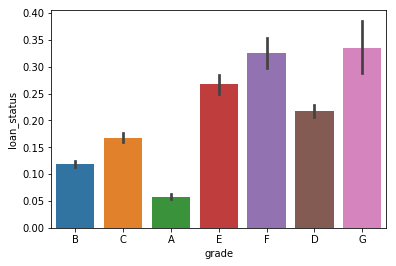

In [31]:
sns.barplot(x='grade', y='loan_status', data = df)
plt.show()

creating the function to plot all the categorical variables against the loan_status variable

In [32]:
def plot_var(var):
    sns.barplot(x=var, y='loan_status', data = df)
    plt.show()

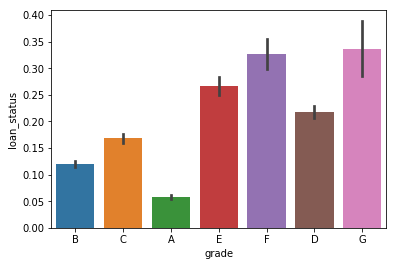

In [33]:
plot_var('grade')

Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by financial instituion based on the riskiness of the loan.

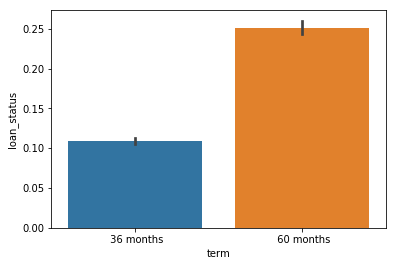

In [34]:
#term: 60 months and 36 months
plot_var('term')

Clearly, 60 months loan default more than 36 months loan

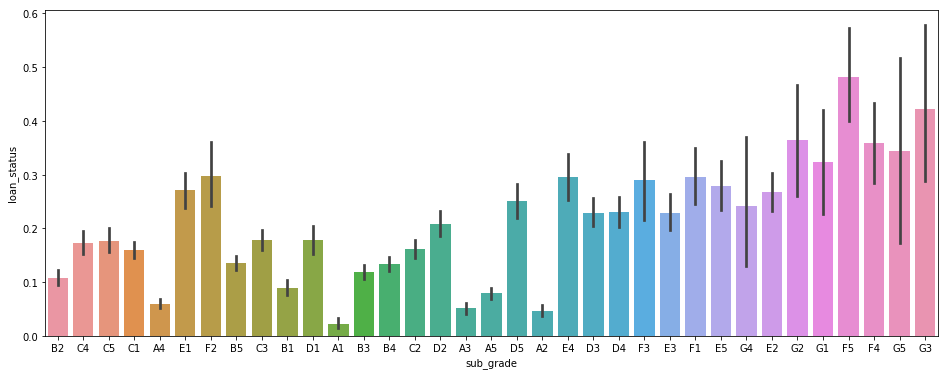

In [35]:
#sub-grade
plt.figure(figsize=(16,6))
plot_var('sub_grade')

Clearly, A1 is better than A2 better than A3 and so on 

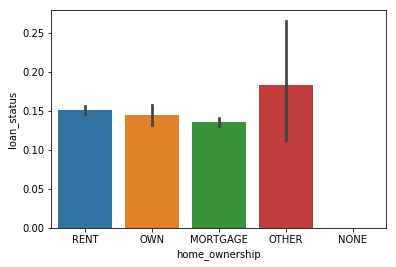

In [36]:
#home-ownership
plot_var('home_ownership')

It is not a greater discriminator

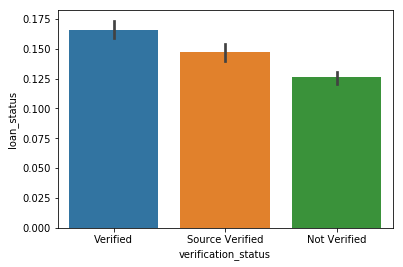

In [37]:
#verification status
plot_var('verification_status')

Suprise!! Verified loan defaults more than the one which are not verified

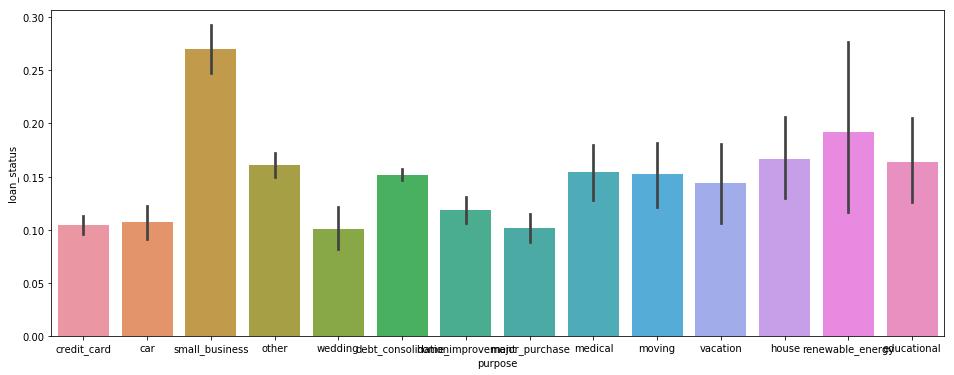

In [38]:
#purpose
plt.figure(figsize=(16,6))
plot_var('purpose')

We can see that the small business loans defualt the most, then renewable energy and education

Lets also observe the distribution of loans among different years

In [39]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Lets convert year column into date and time and then extract year and month from it

In [40]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [41]:
#extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)


In [42]:
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

We can see that the number of loans has increased steadily across years. 

In [43]:
#now groupby month
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

Most loans are granted in December, and in general in the latter half of the year.

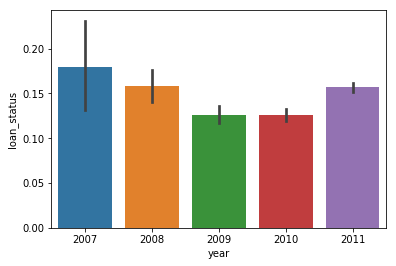

In [44]:
#Default rate accross years
plot_var('year')

The default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010

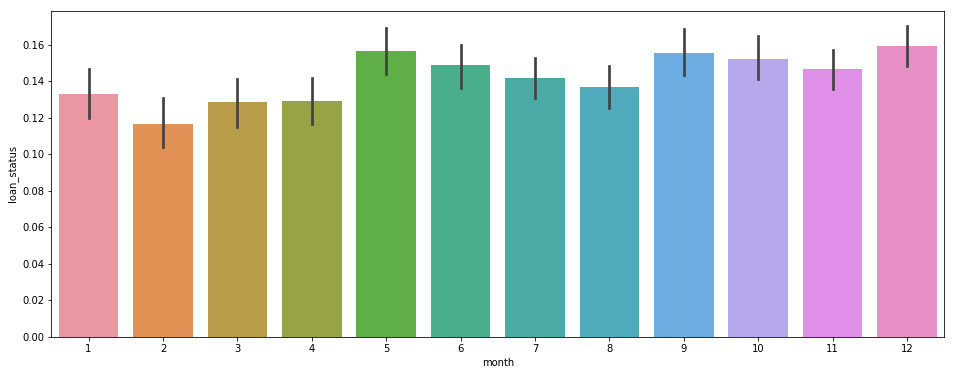

In [45]:
#comparing defaults accross months
plt.figure(figsize=(16,6))
plot_var('month')


Let's now analyse how the default rate varies across continuous variables.

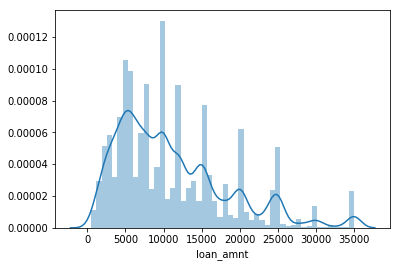

In [46]:
sns.distplot(df['loan_amnt'])
plt.show()

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [47]:
#binnig the loan amount
def loan_amount(n):
    if n<5000:
        return 'low'
    elif n>5000 and n<15000:
        return 'medium'
    elif n>15000 and n<25000:
        return 'high'
    else:
        return 'very high'

df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))    

In [48]:
df['loan_amnt'].value_counts()

medium       18198
low           7095
very high     6484
high          5767
Name: loan_amnt, dtype: int64

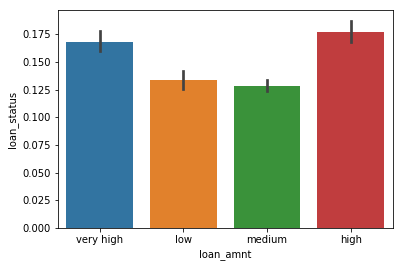

In [49]:
# let's compare the default rates across loan amount type
plot_var('loan_amnt')

Higher the loan amount, higher the default rate

In [50]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

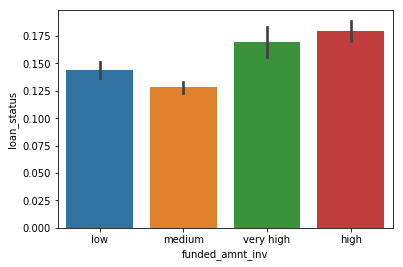

In [51]:
# funded amount invested
plot_var('funded_amnt_inv')

In [52]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

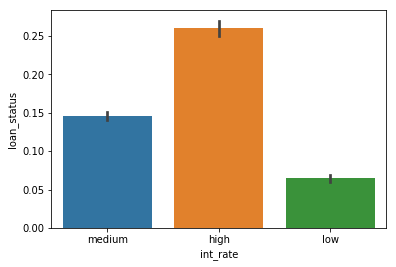

In [53]:
# comparing default rates across rates of interest
plot_var('int_rate')

High interest rates default more, as expected

In [54]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

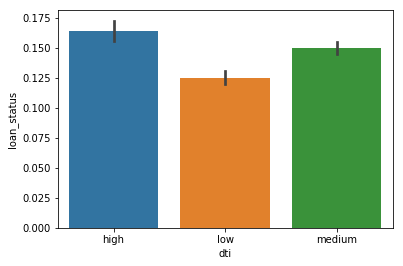

In [55]:
# comparing default rates across debt to income ratio
plot_var('dti')

High dti translates into higher default rates, as expected

In [56]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

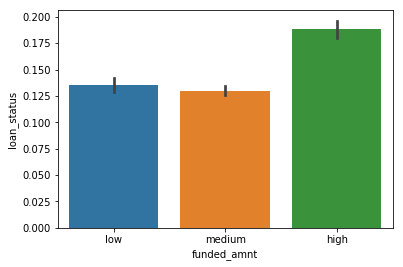

In [57]:
plot_var('funded_amnt')

In [58]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

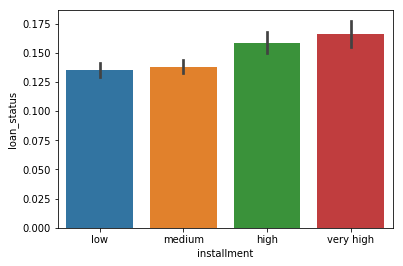

In [59]:
# comparing default rates across installment
plot_var('installment')

The higher the installment amount, the higher the default rate

In [60]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

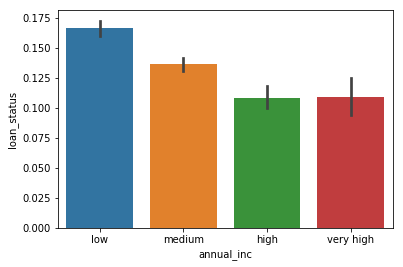

In [61]:
# annual income and default rate
plot_var('annual_inc')

Lower the annual income, higher the default rate

In [62]:
# employment length
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

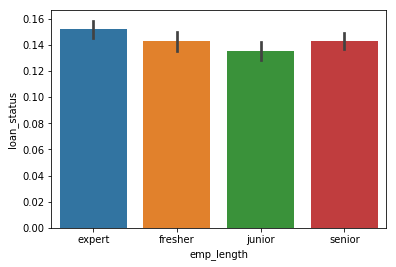

In [63]:
# emp_length and default rate
plot_var('emp_length')

Not much of a predictor of default

## SEGMENTED UNIVARIATE ANALYSIS


We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan like home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

Let's again have a look at the default rates across the purpose of the loan.

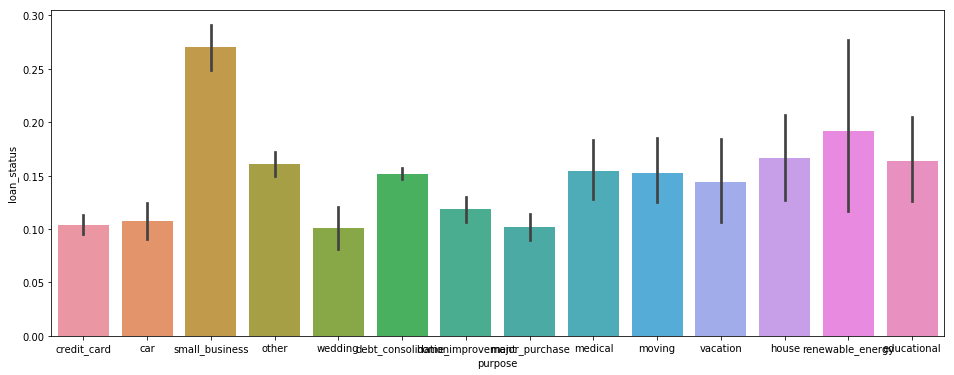

In [64]:
# purpose: 
plt.figure(figsize=(16, 6))
plot_var('purpose')

small business loans defualt the most, then renewable energy and education

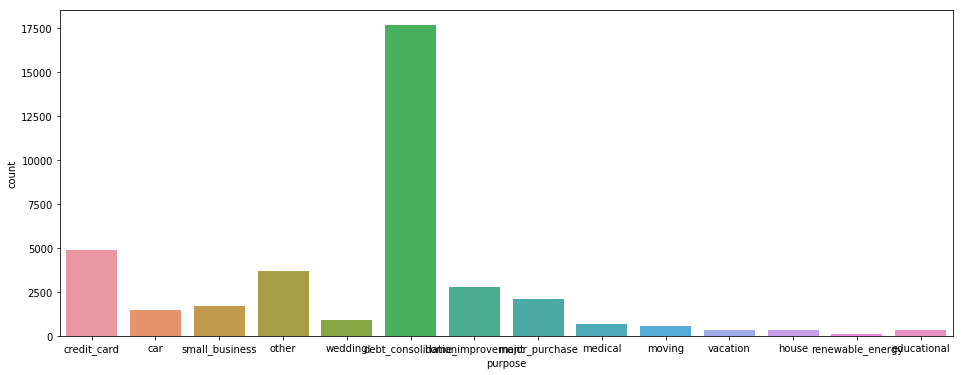

In [65]:
# lets first look at the number of loans for each type (purpose) of the loan
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df)
plt.show()

Most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [66]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

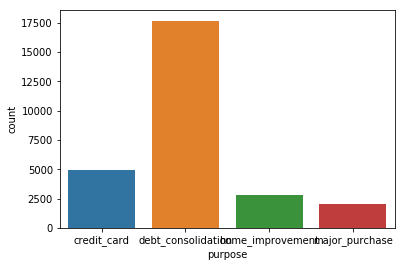

In [67]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.show()

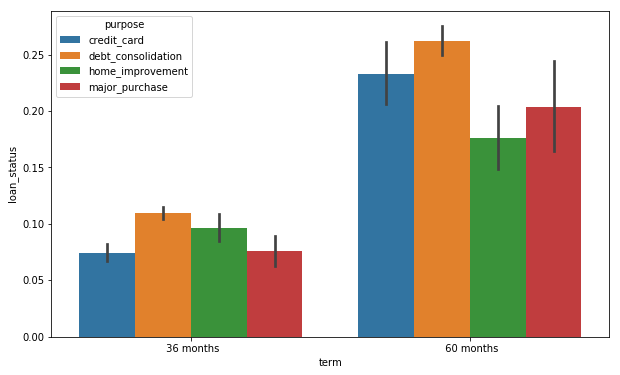

In [68]:
# let's now compare the default rates across two types of categorical variables

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()


Purpose of loan (constant) and another categorical variable (which changes)

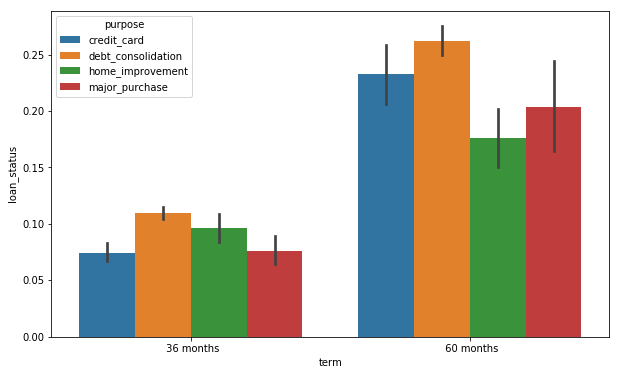

In [69]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

plot_segmented('term')

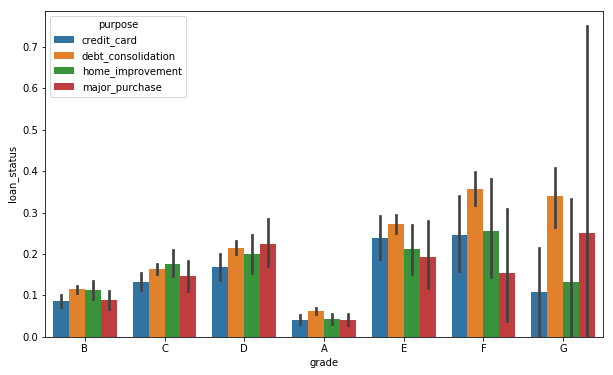

In [70]:
# grade of loan
plot_segmented('grade')

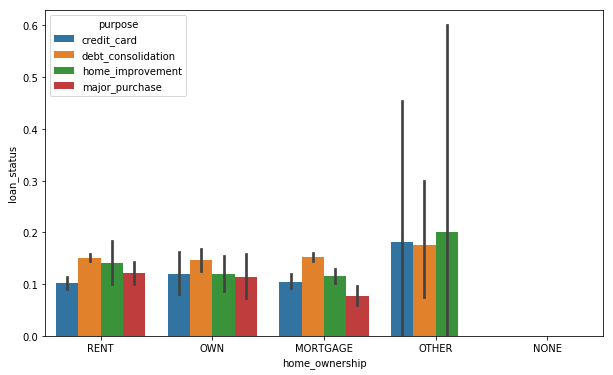

In [71]:
# home ownership
plot_segmented('home_ownership')

In general, debt consolidation loans have the highest default rates. Lets compare across other categories as well.

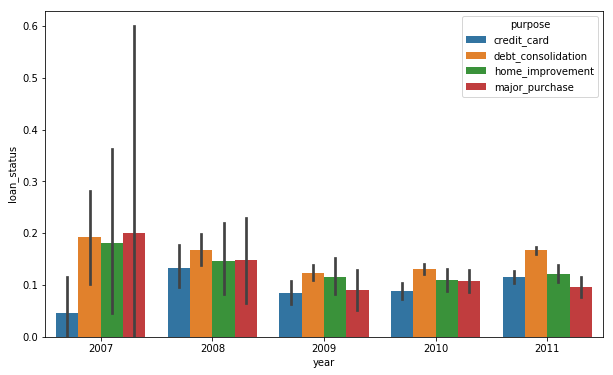

In [72]:
# year
plot_segmented('year')

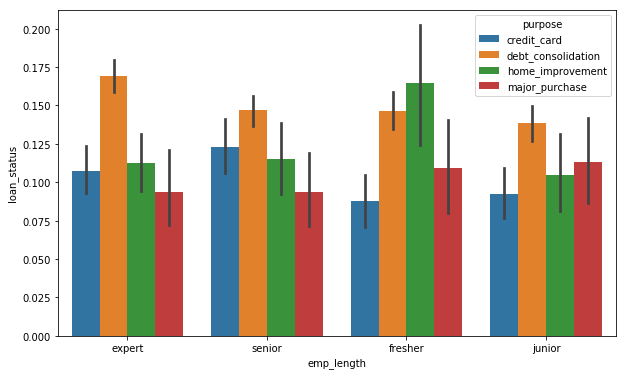

In [73]:
# emp_length
plot_segmented('emp_length')

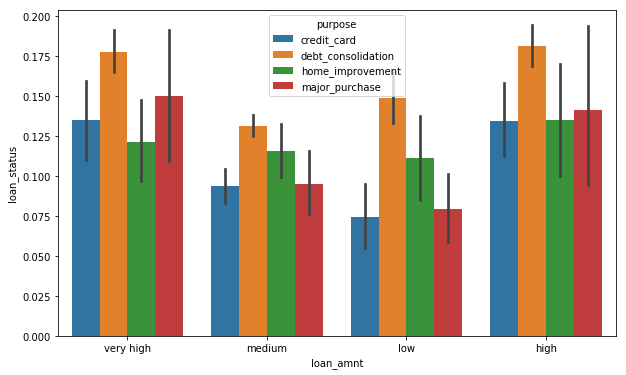

In [74]:
# loan_amnt:
plot_segmented('loan_amnt')

Same trend across loan purposes

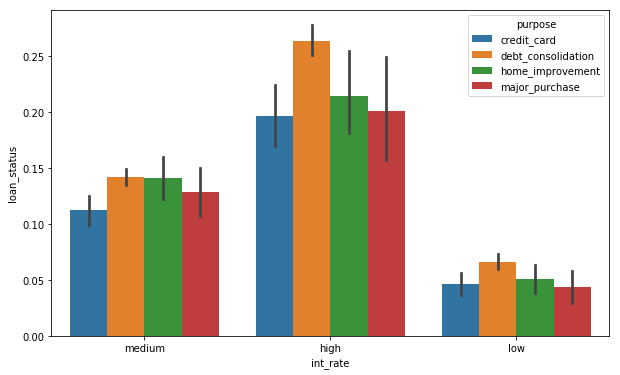

In [75]:
# interest rate
plot_segmented('int_rate')

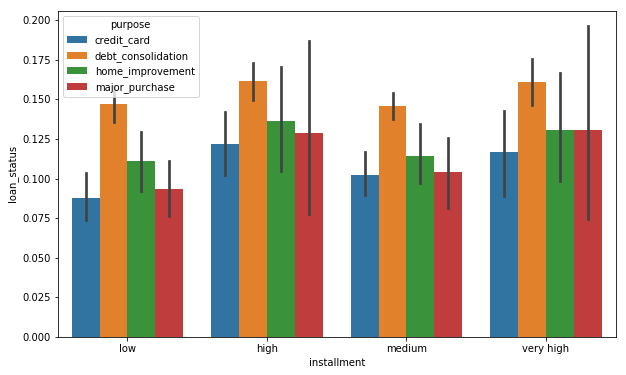

In [76]:
# installment
plot_segmented('installment')

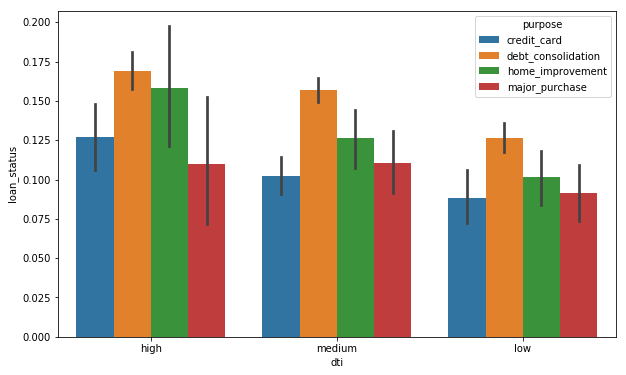

In [77]:
# debt to income ratio
plot_segmented('dti')

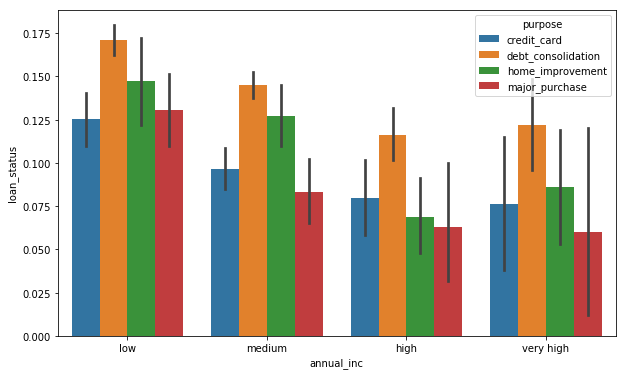

In [78]:
# annual income
plot_segmented('annual_inc')

A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'. 

Let's see an example using annual_inc as the categorical variable.

In [79]:
# variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [80]:
# Lets write a function which takes in a categorical variable and computed the average 
# default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the 
# categories, which is a decent metric indicating the effect of the varaible on default rate

def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)


annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


Thus, there is a 6% increase in default rate as you go from high to low annual income. Similarly, we can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [81]:
# filtering all the object type variables
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in df.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


D:\CSE\app\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 5.0, 'funded_amnt': 5.0, 'funded_amnt_inv': 5.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'earliest_cr_line': 100.0, 'revol_util': 100.0, 'initial_list_status': 0.0, 'last_pymnt_d': 75.0, 'last_credit_pull_d': 47.0, 'application_type': 0.0}
